# Preprocessing Texts for Computational Analysis

### If a document is not in a digital format, the following steps must be taken first:

<ol>
    <li>Scan the document with the brightness set to about 50% and at least 300 dpi and save it as a PDF.</li>
    <li>Run the resulting scanned image through a OCR software. Two options are <a href="https://www.abbyy.com/en-us/finereader/">Abbyy Finereader</a> and <a href="https://pypi.org/project/pytesseract/">Google's Tesseract</a>.
    <ul><li>If you are using Abbyy Finereader, consider removing the headers, page numbers, and footnotes when you OCR and export your document.</li><br>
        </ul></li>
    <li>Save the resulting OCRd document as a plain text file (with the file extension .txt).</li>
    <li>Check the quality of the resulting text document and clean it as necessary. </li>
</ol>

### Preprocessing a plain text file for computational analysis

<ol>
    <li><b>Tokenize</b> the document (or corpus, if you're working with a collection of plain text documents). Tokens are the units of analysis. Normally, a document's tokens are words, but you may also tokenize it by sentences or other units. In the NLTK library, two tokenizers are word_tokenize and sentence_tokenize. In the code that follows, we will tokenize the documents by words, which in Latin and Arabic alphabets, generally separates the document into tokens using spaces and punctuation. In Asian languages, dictionaries are used to tokenize a document.</li>
    <li><b>Remove stopwords.</b> Determine which words carry less meaning in your document or corpus and remove them. Usually, stopwords include articles, pronouns, and numbers. There are standard stopword lists for every language and even for variations on the languages. In the code that follows, we will use the standard English stopwords list that comes with NLTK, but you can create and use your own custom stopwords list if you want to analyze some of the words that standards lists usually remove, such as pronouns.</li>
    <li><b>Stem or lemmatize the tokens in the document/corpus.</b>Stemming removes common word endings,such as -ly, -e, -s, -es, and -ing, whereas lemmatizing will reduce every word to its root. For more information, see <a href="https://www.datacamp.com/community/tutorials/stemming-lemmatization-python">Data Camp's article</a> on the difference between the two and applications of each.</li>
</ol>

In [14]:
#Import the NLTK library and the specific functions we will use for the first two steps of preprocessing the
#1795 Treaty of Greenville council meeting notes.

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

#Define stopwords as the standard English stopwords list from NLTK.
stopwords = stopwords.words('english')

#To add additional stopwords, uncomment the following line and adjust the words you want to remove
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

#To see what words are considered standard stopwords in the English language in NLTK, print them out.
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
#Open the document or corpus you need to preprocess
text = open("/Users/asg/Dropbox/00-UCLA/Course/DH199-s20/Corpus/councils/1795GreenvilleTreaty.txt").read()

#Tokenize the text
tokens = word_tokenize(text)

#Make all words lowercase
tokens_lower = [w.lower() for w in tokens]

#Remove stopwords, punctuation, and numbers.
content = [w for w in tokens_lower if w not in stopwords and w.isalpha()]

#Check to see what the content looks like.
print(content)

['utter', 'major', 'general', 'anthony', 'wayne', 'secretary', 'war', 'dated', 'head', 'quarters', 'greenville', 'august', 'infinite', 'pleasure', 'inform', 'treaty', 'peace', 'united', 'states', 'america', 'late', 'hostile', 'tribes', 'indians', 'northwest', 'ohio', 'unanimously', 'voluntarily', 'agreed', 'cheerfully', 'signed', 'sachems', 'war', 'chiefs', 'respective', 'nations', 'exchanged', 'instant', 'minutes', 'treaty', 'tribes', 'indians', 'called', 'wyandots', 'shawanese', 'pattawatamies', 'miamies', 'eel', 'river', 'kickapoos', 'piankesnaws', 'kaskaskias', 'begun', 'greenville', 'day', 'june', 'arid', 'ended', 'day', 'august', 'considerable', 'number', 'delawares', 'ottawas', 'pattawatamies', 'eel', 'river', 'indians', 'arrived', 'greenville', 'since', 'beginning', 'june', 'general', 'wayne', 'caused', 'assembled', 'together', 'tuesday', 'first', 'time', 'met', 'general', 'council', 'presented', 'smoked', 'calumet', 'peace', 'general', 'arose', 'addressed', 'follows', 'v', 'ta

<FreqDist with 2596 samples and 12507 outcomes>


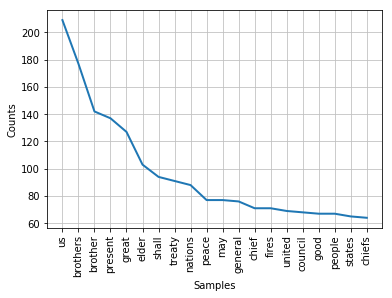

In [16]:
#If you don't already have matplotlib installed, uncomment the following line the first time you run the code.
#!pip install matplotlib

#Import matplot lib to graph the top 20 most frequently occurring words, 
#and from NLTK, import FreqDist to generate the frequency list.
import matplotlib
from nltk import FreqDist

#Provide the pre-processed content as the argument for the FreqDist function.
fdist1 = FreqDist(content)
#Print the number of unique words/tokens in document/corpus (samples) 
#and the total number of times those tokens appear (outcomes).
print(fdist1)

#Identify the 20 most frequently occurring tokens and plot them.
fdist1.most_common(20)

fdist1.plot(20)

In [7]:
#The Porter stemmer from NLTK was chosen for this example because it leaves more of the original word intact, 
#whereas the Lancaster stemmer is more aggressive and removes additional letters from the original word.
porter = nltk.PorterStemmer()

stemmed = [porter.stem(t) for t in content]

#Print the tokenized and stemmed results after removing the stopwords to see how the stemmer functions.
print(stemmed)

['utter', 'major', 'gener', 'anthoni', 'wayn', 'secretari', 'war', 'date', 'head', 'quarter', 'greenvil', 'august', 'infinit', 'pleasur', 'inform', 'treati', 'peac', 'unit', 'state', 'america', 'late', 'hostil', 'tribe', 'indian', 'northwest', 'ohio', 'unanim', 'voluntarili', 'agre', 'cheer', 'sign', 'sachem', 'war', 'chief', 'respect', 'nation', 'exchang', 'instant', 'minut', 'treati', 'tribe', 'indian', 'call', 'wyandot', 'shawanes', 'pattawatami', 'miami', 'eel', 'river', 'kickapoo', 'piankesnaw', 'kaskaskia', 'begun', 'greenvil', 'day', 'june', 'arid', 'end', 'day', 'august', 'consider', 'number', 'delawar', 'ottawa', 'pattawatami', 'eel', 'river', 'indian', 'arriv', 'greenvil', 'sinc', 'begin', 'june', 'gener', 'wayn', 'caus', 'assembl', 'togeth', 'tuesday', 'first', 'time', 'met', 'gener', 'council', 'present', 'smoke', 'calumet', 'peac', 'gener', 'aros', 'address', 'follow', 'v', 'take', 'hand', 'brother', 'assembl', 'good', 'work', 'peac', 'thank', 'great', 'spirit', 'gloriou',

<FreqDist with 1951 samples and 12507 outcomes>


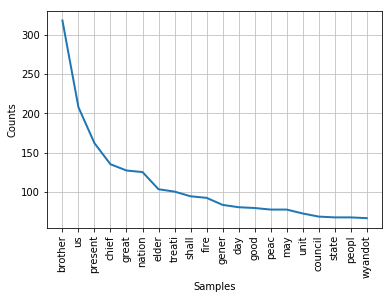

In [12]:
#Create a frequency distribution of the stemmed tokens.
fdist2 = FreqDist(stemmed)

#Print the number of samples and outcomes, notice that there are fewer unique words. This is the point of a stemmer.
#Stemming becomes much more important for this reason when you begin to work with more advanced computational 
#techniques, such as Vector Space Models, because it reduces the dimensionality of the high-dimensional space
#you create, which makes processing the text more efficient, and, therefore, faster.
print(fdist2)

#Identify and graph the top 20 most frequently occurring stemmed words. 
#Notice that all variants of brother reduce to this root.
fdist2.most_common(20)

fdist2.plot(20)